In [275]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [276]:
zoo=pd.read_csv('zoo.csv')
class1 = pd.read_csv('class.csv')

In [277]:
zoo.head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [278]:
zoo.columns.unique()

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

In [279]:
zoo2 = zoo.copy()
zoo2

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [280]:
class1.head(10)

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [281]:
zoo.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [282]:
class1.isnull().sum()

Class_Number                         0
Number_Of_Animal_Species_In_Class    0
Class_Type                           0
Animal_Names                         0
dtype: int64

In [283]:
#There are no missing values in the dataset

In [284]:
y = zoo['class_type']

In [285]:
zoo1 = zoo.drop(columns=['animal_name', 'class_type'])

In [286]:
pca = PCA()
zoo = pca.fit_transform(zoo1)
pca.fit(zoo) # Learning / training

PCA()

In [287]:
pca.fit(zoo) # Learning / training

PCA()

In [288]:
zoo

array([[ 1.35102851, -1.05853312,  0.31410259, ...,  0.22776438,
         0.05746399,  0.04819587],
       [ 1.30663411, -1.20834446, -0.28940524, ..., -0.00645594,
        -0.003654  , -0.031995  ],
       [-3.13165517,  0.25220045,  0.92941871, ...,  0.08950714,
        -0.00613439,  0.01599322],
       ...,
       [ 1.27729583, -1.22574951,  0.12623911, ..., -0.02718482,
        -0.01747613, -0.01449933],
       [-2.62160156,  0.84538463, -0.44020121, ..., -0.19388607,
        -0.11100554, -0.00721392],
       [-0.87003814,  1.00958479, -1.3082922 , ...,  0.11598219,
         0.06519472, -0.00965952]])

In [289]:
pca.explained_variance_ratio_

array([6.25615480e-01, 1.44969052e-01, 7.25316892e-02, 3.90853591e-02,
       2.52571291e-02, 2.12712117e-02, 1.49124811e-02, 1.36876986e-02,
       1.06283642e-02, 9.59018109e-03, 8.16760981e-03, 5.38981516e-03,
       4.28633321e-03, 2.99551097e-03, 1.10195811e-03, 5.10126551e-04])

In [290]:
np.cumsum(pca.explained_variance_ratio_)

array([0.62561548, 0.77058453, 0.84311622, 0.88220158, 0.90745871,
       0.92872992, 0.9436424 , 0.9573301 , 0.96795847, 0.97754865,
       0.98571626, 0.99110607, 0.9953924 , 0.99838792, 0.99948987,
       1.        ])

In [291]:
pca.explained_variance_

array([4.39219233e+00, 1.01776886e+00, 5.09215546e-01, 2.74402440e-01,
       1.77320050e-01, 1.49336543e-01, 1.04694476e-01, 9.60957755e-02,
       7.46174308e-02, 6.73287684e-02, 5.73414729e-02, 3.78397043e-02,
       3.00926055e-02, 2.10302665e-02, 7.73640059e-03, 3.58139143e-03])

In [292]:
np.cumsum(pca.explained_variance_)

array([4.39219233, 5.40996119, 5.91917673, 6.19357917, 6.37089922,
       6.52023577, 6.62493024, 6.72102602, 6.79564345, 6.86297222,
       6.92031369, 6.9581534 , 6.988246  , 7.00927627, 7.01701267,
       7.02059406])

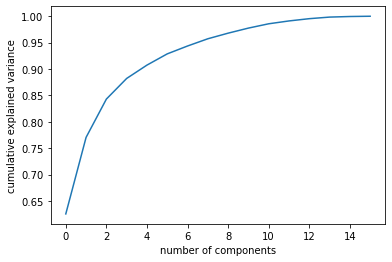

In [293]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [294]:
#From here it is clearly visible that the maximum variability is explained by 8 features from then onwards it tappers. 
#Hence we can take those into account and use the same for building our model

In [295]:
pca = PCA(n_components=8)
zoo_x_prime = pca.fit_transform(zoo)

In [296]:
zoo_x_prime

array([[ 1.35102851e+00, -1.05853312e+00,  3.14102592e-01,
        -4.74432804e-02,  7.22133879e-01, -7.25684382e-02,
         1.93097617e-01, -2.63609397e-03],
       [ 1.30663411e+00, -1.20834446e+00, -2.89405242e-01,
         1.18023825e-01, -2.18509020e-01, -2.85344483e-01,
        -1.89076917e-01, -3.15514036e-01],
       [-3.13165517e+00,  2.52200446e-01,  9.29418707e-01,
         8.17237403e-02, -3.89770531e-01,  2.66292486e-01,
        -8.56332005e-03, -2.16674313e-02],
       [ 1.35102851e+00, -1.05853312e+00,  3.14102592e-01,
        -4.74432804e-02,  7.22133879e-01, -7.25684382e-02,
         1.93097617e-01, -2.63609397e-03],
       [ 1.27729583e+00, -1.22574951e+00,  1.26239109e-01,
        -4.42240813e-01,  2.18646697e-01,  1.25204042e-01,
        -9.69339956e-02, -4.35679868e-02],
       [ 1.30663411e+00, -1.20834446e+00, -2.89405242e-01,
         1.18023825e-01, -2.18509020e-01, -2.85344483e-01,
        -1.89076917e-01, -3.15514036e-01],
       [ 1.32106857e+00, -1.257642

In [297]:
zoo_x_prime.shape

(101, 8)

In [298]:
from sklearn.preprocessing import scale
zoo_x_scaled = scale(zoo)

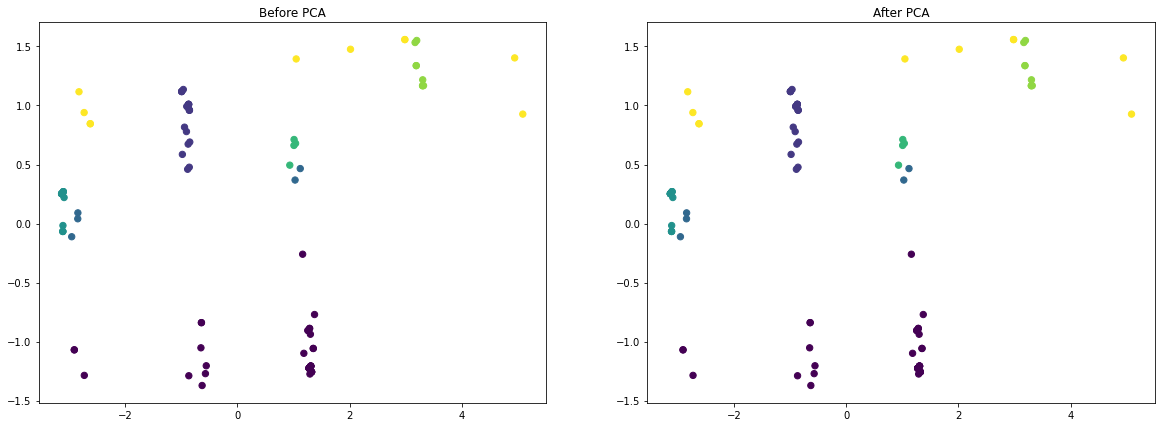

In [299]:
fig = plt.figure(figsize=(20,7))

ax = fig.add_subplot(121)
ax.scatter(zoo[:,0],zoo[:,1],c=y,s=40)
ax.set_title('Before PCA')

ax2 = fig.add_subplot(122)
ax2.scatter(zoo_x_prime[:,0],zoo_x_prime[:,1],c=y,s=40)
ax2.set_title('After PCA')
plt.show()

In [300]:
pca = PCA(n_components=0.95)
zoo_x_prime = pca.fit(zoo).transform(zoo)
pca.explained_variance_ratio_.sum()

0.9573301008537259

In [301]:
pca.components_

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00],
       [-0.00000000e+00,  1.00000000e+00, -1.71963237e-16,
         1.52685321e-17,  5.43571402e-17, -5.99052898e-17,
        -1.39184747e-16, -3.32519557e-18,  2.39384426e-17,
         3.48812549e-17, -5.29663959e-17, -3.78162304e-17,
         2.39384426e-17, -5.08951069e-18, -5.59439054e-18,
        -1.95110055e-18],
       [-0.00000000e+00,  1.04465536e-16,  1.00000000e+00,
         5.47381242e-16, -3.46213752e-17,  4.03449851e-17,
        -7.47500357e-16, -4.59793089e-17, -7.95994358e-17,
        -2.15072846e-16,  6.28963902e-17,  1.64600886e-16,
        -2.07968973e-16, -2.59366488e-16,  1.03836103e-17,
         1.27135188e-16],
       [-0.00000000e+00,  2.50902418e

## PCA with standardization of data

In [302]:
from sklearn.preprocessing import scale

In [303]:
zoo_X_scaled = scale(zoo)
pca = PCA(n_components=8)
zoo_X_scaled_prime = pca.fit_transform(zoo_X_scaled)

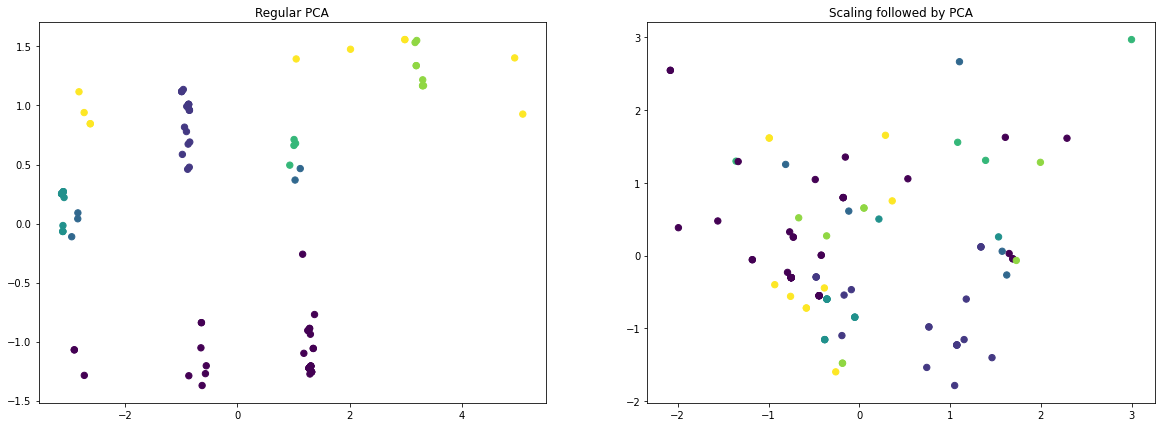

In [304]:
fig = plt.figure(figsize=(20,7))

ax = fig.add_subplot(121)
ax.scatter(zoo_x_prime[:,0],zoo_x_prime[:,1],c=y,s=40)
ax.set_title('Regular PCA')

ax2 = fig.add_subplot(122)
ax2.scatter(zoo_X_scaled_prime[:,0],zoo_X_scaled_prime[:,1],c=y,s=40)
ax2.set_title('Scaling followed by PCA')
plt.show()

In [305]:
# Here dimentionality is not that much and the data set is not that large hence using PCA wont stmake a greater difference. 
#Still we can select 8 features herev which is giving highest variability

# Applying KNN Model

In [312]:
zoo2.columns.unique()

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'class_type'],
      dtype='object')

In [307]:
#Now we are using the features which are using the maximum variablity and taking them only in our model. 

In [ ]:
zoo2 = zoo2.drop(columns=['animal_name'])

In [316]:
zoo2

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,class_type
0,1,0,0,1,0,0,1,1,1
1,1,0,0,1,0,0,0,1,1
2,0,0,1,0,0,1,1,1,4
3,1,0,0,1,0,0,1,1,1
4,1,0,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1
97,1,0,1,0,1,0,0,0,6
98,1,0,0,1,0,0,1,1,1
99,0,0,1,0,0,0,0,0,7


In [317]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
x,y = zoo2.loc[:,zoo2.columns != 'class_type'], zoo2.loc[:,'class_type']
knn.fit(x,y)
prediction = knn.predict(x)
print("Prediction = ",prediction)

Prediction =  [1 1 4 1 1 1 1 4 4 1 1 2 4 7 7 7 2 1 4 1 2 2 1 2 7 4 4 1 1 1 6 1 1 2 4 1 1
 2 4 6 6 2 6 2 1 1 7 1 1 1 1 6 4 7 1 1 2 2 2 2 4 4 3 1 1 1 1 1 1 1 1 2 7 4
 1 1 3 7 2 2 3 7 4 2 1 7 4 2 7 4 7 3 4 1 1 2 1 6 1 7 2]


In [318]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 1)
x,y = zoo2.loc[:,zoo2.columns != 'class_type'], zoo2.loc[:,'class_type']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=1) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=1) accuracy is:  0.9032258064516129


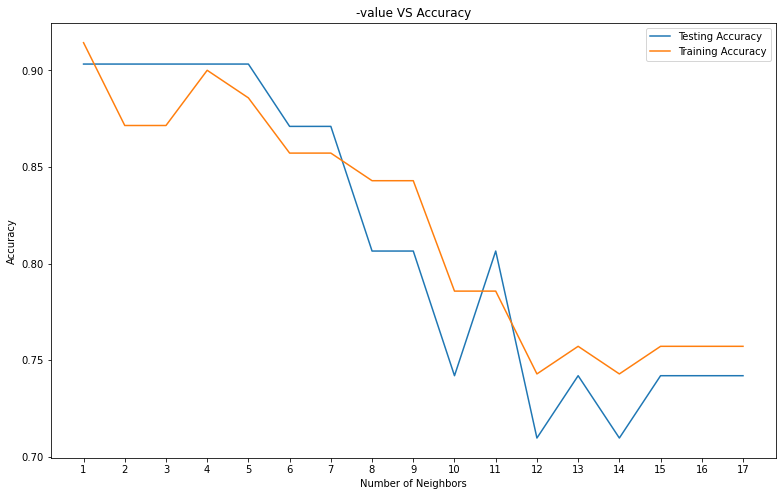

Best accuracy is 0.9032258064516129 with K = 1


In [319]:
k_values = np.arange(1,18)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 18(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

    # Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))


# Cross Validation 

In [320]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=5)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, x, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.85714286 0.8        0.85       0.85       0.9       ]
cv_scores mean:0.8514285714285714


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


# Hypertuning model parameters using GridSearchCV

In [321]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(x, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [322]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 4}

In [323]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.8914285714285715

# Now a model for n neighbor with optimized k = 4 from Cross Validation

In [324]:
knn = KNeighborsClassifier(n_neighbors = 4)

In [325]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [326]:
knn.score(x_test,y_test)

0.9032258064516129

### Now using KNN with K = 4 the score is highest till now

# Confusion Matrix

In [328]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc, classification_report

[[15  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  3  0  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  1  0  0  0  2  0]
 [ 0  0  0  0  0  1  2]]


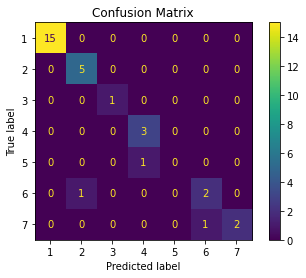

In [329]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(knn, x_test, y_test)
cmap=plt.cm.Blues
disp.ax_.set_title("Confusion Matrix")
print(disp.confusion_matrix)

# Logistic Regression

In [330]:
#Here the same dataset is used which is taken for KNN ie. the one whic

In [331]:
zoo3 = zoo2.copy()
zoo3

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,class_type
0,1,0,0,1,0,0,1,1,1
1,1,0,0,1,0,0,0,1,1
2,0,0,1,0,0,1,1,1,4
3,1,0,0,1,0,0,1,1,1
4,1,0,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1
97,1,0,1,0,1,0,0,0,6
98,1,0,0,1,0,0,1,1,1
99,0,0,1,0,0,0,0,0,7


In [332]:
from sklearn.linear_model import LogisticRegression

In [333]:
test_size = 0.3
seed = 1
X_train, X_test, y_train, y_test = train_test_split(zoo3.drop('class_type', axis=1), zoo3['class_type'], test_size = test_size, random_state = seed)

In [334]:
model = LogisticRegression(random_state = 1, class_weight='balanced', max_iter = 1000)
model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=1)

In [335]:
model.predict_proba(X_test)

array([[0.85806849, 0.00590327, 0.06181132, 0.01249353, 0.01354609,
        0.04257543, 0.00560186],
       [0.00672545, 0.80895796, 0.01286363, 0.03431462, 0.03272817,
        0.02056743, 0.08384274],
       [0.85806849, 0.00590327, 0.06181132, 0.01249353, 0.01354609,
        0.04257543, 0.00560186],
       [0.0068079 , 0.79220264, 0.02724782, 0.00869066, 0.00919179,
        0.13535314, 0.02050605],
       [0.85806849, 0.00590327, 0.06181132, 0.01249353, 0.01354609,
        0.04257543, 0.00560186],
       [0.01738675, 0.05603792, 0.06172881, 0.10363384, 0.09994296,
        0.04221705, 0.61905268],
       [0.85806849, 0.00590327, 0.06181132, 0.01249353, 0.01354609,
        0.04257543, 0.00560186],
       [0.0068079 , 0.79220264, 0.02724782, 0.00869066, 0.00919179,
        0.13535314, 0.02050605],
       [0.02404063, 0.02300728, 0.09698014, 0.37643136, 0.40621844,
        0.04648744, 0.02683472],
       [0.02755237, 0.02485461, 0.13619206, 0.36506832, 0.35344312,
        0.01522725, 0.0

In [336]:
model.predict_proba(X_test)

array([1, 2, 1, 2, 1, 7, 1, 2, 5, 4, 2, 1, 1, 1, 1, 1, 1, 1, 6, 3, 2, 1,
       6, 6, 4, 7, 7, 1, 4, 1, 1], dtype=int64)

In [337]:
print('classes: ',model.classes_)
print('coefficients: ',model.coef_)
print('intercept :',model.intercept_)

classes:  [1 2 3 4 5 6 7]
coefficients:  [[ 1.35779659 -0.09148593 -1.14628601  1.72247446 -0.17425902 -0.30503974
   0.08921575  0.4795951 ]
 [-0.3460393   2.47154819  0.19074589 -0.07967454  0.88223545 -0.21281304
   0.03010463 -0.7937705 ]
 [-0.71636605 -0.40579939 -0.62827964 -0.65231495 -0.47848181 -1.24663974
   0.29243222  0.81053033]
 [-0.22502132 -0.20490207  0.74736261 -0.22901951 -0.21632505  1.24746301
  -0.07777885  1.27843557]
 [-0.22775757 -0.20668959  0.73587273 -0.22792127 -0.22560851  1.25258361
  -0.18629615  1.28233783]
 [ 0.56145656 -0.84012864  0.35429227 -0.26300454  0.80507859 -0.92459354
  -1.16322305 -1.00052244]
 [-0.40406891 -0.72254257 -0.25370786 -0.27053964 -0.59263965  0.18903944
   1.01554545 -2.05660588]]
intercept : [-0.12803387 -0.32786113  1.35938562 -1.62203513 -1.54341277  1.13049617
  1.13146112]


In [338]:
pred = model.predict(X_test)

In [339]:
con_mat1 = confusion_matrix(y_test, pred )
print(con_mat1)

[[15  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  2  1  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  0  0  2  1]
 [ 0  0  0  0  0  1  2]]


In [340]:
pred = model.predict(X_test)
labels = [1, 2, 3, 4, 5, 6, 7]
con_mat = confusion_matrix(y_test, pred, labels = labels )
print(con_mat)

[[15  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  2  1  0  0]
 [ 0  0  0  1  0  0  0]
 [ 0  0  0  0  0  2  1]
 [ 0  0  0  0  0  1  2]]


In [341]:
accuracy=(con_mat[0,0] + con_mat[1,1])/y_test.size
np.mean(y_test == pred)

0.8709677419354839

In [342]:
model_1=LogisticRegression(class_weight = 'balanced')

In [343]:
model_1.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [344]:
model_1.score(X_test, y_test)

0.8709677419354839

# Grid search cross validation with 2 hyperparameter

In [345]:
# 1. hyperparameter is C:logistic regression regularization parameter
# 2. penalty l1 or l2
# Hyperparameter grid
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(x_train,y_train)

# Print the optimal parameters and best score
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_v

Tuned hyperparameters : {'C': 10.0, 'penalty': 'l2'}
Best Accuracy: 0.9003623188405797


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logi

## Plotting ROC, AUC Curve now

In [347]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

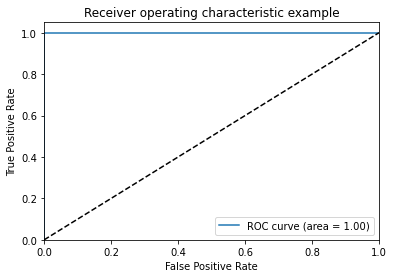

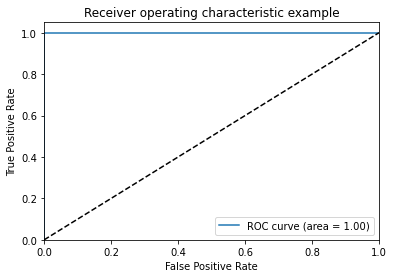

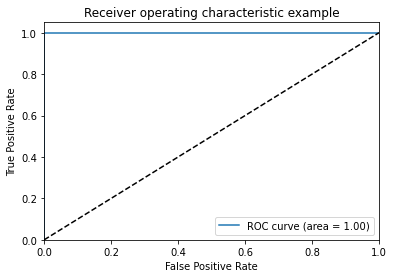

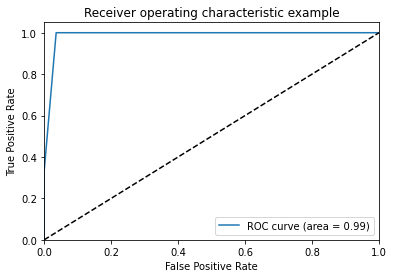

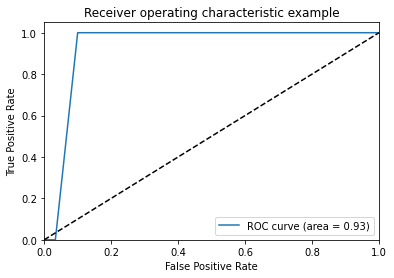

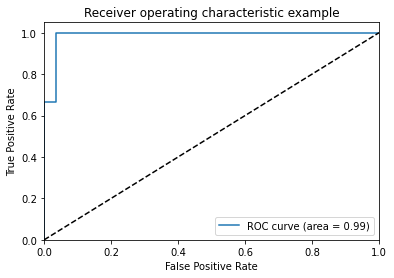

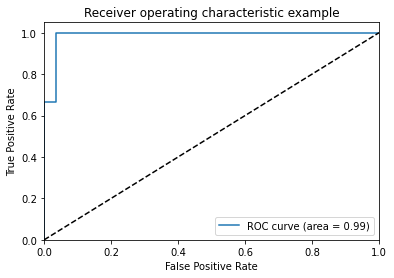

In [348]:
y = label_binarize(y, classes=[1,2,3,4,5,6,7])
n_classes = 7

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(x, y, test_size=0.30, random_state=1)

# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=1))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### Now using Logistic Regression with Cross Validation we are getting 90.0362 percent score which is almost equal to the optimnized model we developed using KNN with Cross Validation and Hyper Parameter Tuning ie . 90.322 percent. Hence we can conclude that by using both the models perform equally well in both Test sets. 